In [1]:
from sklearn import tree
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
original_df_train = pd.read_csv(os.path.join("Resources", "responses_combined_7000.csv"))

original_df_train.columns

Index(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director',
       'Episode', 'Genre', 'Language', 'Metascore', 'Plot', 'Poster',
       'Production', 'Rated', 'Ratings', 'Released', 'Response', 'Runtime',
       'Season', 'Title', 'Type', 'Website', 'Writer', 'Year', 'imdbID',
       'imdbRating', 'imdbVotes', 'seriesID', 'totalSeasons', 'Budget',
       'Popularity', 'net_income', 'profitable', 'TMDB_id', 'Unnamed: 34'],
      dtype='object')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
original_df_train.tail()

,Actors,Awards,BoxOffice,Country,DVD,Director,Episode,Genre,Language,Metascore,Plot,Poster,Production,Rated,Ratings,Released,Response,Runtime,Season,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes,seriesID,totalSeasons,Budget,Popularity,net_income,profitable,TMDB_id,Unnamed: 34
7383,"Tom Berenger, William McNamara, Erika Eleniak,...",NaN,1596687.0,USA,5-Dec-00,Dennis Hopper,NaN,Comedy,English,NaN,A hapless Navy grunt is assigned SP duty. The ...,https://m.media-amazon.com/images/M/MV5BMTYzNT...,Warner Home Video,R,"[{'Source': 'Internet Movie Database', 'Value'...",22-Apr-94,True,102 min,NaN,Chasers,movie,NaN,"Joe Batteer (story), John Rice (story), Joe Ba...",1994,tt0109403,5.0,"5,175",NaN,NaN,0.0,9.853270,1596687,1,NaN,en
7384,"Mira Barkhammar, Mira Grosin, Liv LeMoyne, Joh...",13 wins & 19 nominations.,180590.0,"Sweden, Denmark",20-Jun-14,Lukas Moodysson,NaN,"Drama, Music",Swedish,87.0,Three girls in 1980s Stockholm decide to form ...,https://m.media-amazon.com/images/M/MV5BMTg2MD...,Magnolia Pictures,Not Rated,"[{'Source': 'Internet Movie Database', 'Value'...",20-Jun-14,True,102 min,NaN,We Are the Best!,movie,http://www.magpictures.com/wearethebest/,"Lukas Moodysson, Coco Moodysson (comic book)",2013,tt2364975,7.2,"9,221",NaN,NaN,0.0,3.727996,180590,1,NaN,sv
7385,"Geena Davis, Samuel L. Jackson, Yvonne Zima, C...",3 nominations.,89456761.0,USA,6-Feb-01,Renny Harlin,NaN,"Action, Crime, Drama, Mystery, Thriller",English,44.0,A woman suffering from amnesia begins to recov...,https://m.media-amazon.com/images/M/MV5BNTkzOW...,New Line Home Entertainment,R,"[{'Source': 'Internet Movie Database', 'Value'...",11-Oct-96,True,121 min,NaN,The Long Kiss Goodnight,movie,NaN,Shane Black,1996,tt0116908,6.8,"67,293",NaN,NaN,65000000.0,14.482345,24456761,1,NaN,en
7386,"Ben Stiller, Jennifer Aniston, Philip Seymour ...",1 win & 9 nominations.,171963386.0,USA,8-Jun-04,John Hamburg,NaN,"Comedy, Romance","English, Spanish",44.0,A buttoned up newlywed finds his too organized...,https://m.media-amazon.com/images/M/MV5BMTcxMD...,Universal Pictures,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",16-Jan-04,True,90 min,NaN,Along Came Polly,movie,http://www.alongcamepolly.com/,John Hamburg,2004,tt0343135,5.9,"117,907",NaN,NaN,42000000.0,15.725542,129963386,1,NaN,en
7387,"Jake Andolina, Oriah Acima Andrews, Ken Arnold...",2 wins & 3 nominations.,82087155.0,USA,17-Jan-12,John Singleton,NaN,"Action, Mystery, Thriller",English,25.0,A thriller centered on a young man who sets ou...,https://m.media-amazon.com/images/M/MV5BMTkxNz...,Lionsgate Films,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",23-Sep-11,True,106 min,NaN,Abduction,movie,http://www.abductionthefilm.com/,Shawn Christensen,2011,tt1600195,5.1,"72,055",NaN,NaN,35000000.0,10.512109,47087155,1,NaN,en


In [5]:
# Create variable with TRUE if nationality is USA
moviesdf= original_df_train[original_df_train['Type'] == "movie"]
moviesdf= original_df_train[original_df_train['net_income'] > -25000000]
moviesdf= moviesdf[['Budget', 'Actors', 'Country' ,'Director', 'Genre', 'Language', 'Metascore', 'Production', 'Rated', 'Runtime', 'Writer', 'Popularity', 'profitable', 'net_income']]

In [6]:
data= moviesdf
data.head()

,Budget,Actors,Country,Director,Genre,Language,Metascore,Production,Rated,Runtime,Writer,Popularity,profitable,net_income
0,237000000.0,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","UK, USA",James Cameron,"Action, Adventure, Fantasy, Sci-Fi","English, Spanish",83.0,20th Century Fox,PG-13,162 min,James Cameron,26.695,1,523505847
1,300000000.0,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",USA,Gore Verbinski,"Action, Adventure, Fantasy",English,50.0,Buena Vista,PG-13,169 min,"Ted Elliott, Terry Rossio, Ted Elliott (charac...",25.567,1,9404152
3,250000000.0,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...","UK, USA",Christopher Nolan,"Action, Thriller","English, Arabic",78.0,Warner Bros. Pictures,PG-13,164 min,"Jonathan Nolan (screenplay), Christopher Nolan...",32.240,1,198130642
5,258000000.0,"Tobey Maguire, Kirsten Dunst, James Franco, Th...",USA,Sam Raimi,"Action, Adventure, Sci-Fi","English, French",59.0,Sony Pictures,PG-13,139 min,"Sam Raimi (screenplay), Ivan Raimi (screenplay...",25.244,1,78530303
7,250000000.0,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",USA,Joss Whedon,"Action, Adventure, Sci-Fi","English, Korean",66.0,Walt Disney Pictures,PG-13,141 min,"Joss Whedon, Stan Lee (based on the Marvel com...",59.525,1,208991599


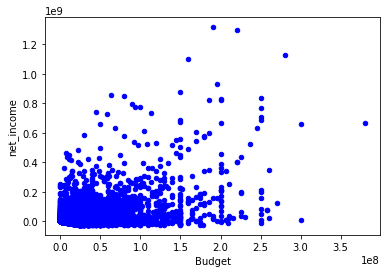

In [7]:
data.plot.scatter(x="Budget", y="net_income", c="blue")

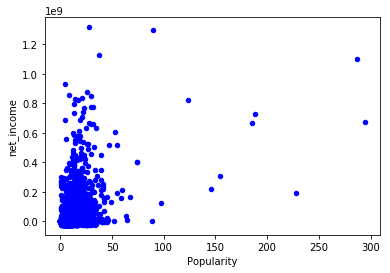

In [8]:
data.plot.scatter(x="Popularity", y="net_income", c="blue")

In [9]:
# Prepare Data
# We need to prepare our test and training data. Usually, implementing this takes a lot of time, but for this simple example we will just remove features that would be too complicated to preprocess.

# This function will be called later to prepare our input data
def prepare_train_data(df):
    # a.) Use the `id` feature as the index column of the data frame
    new_genre = df["Genre"].str.split(",", n = 17, expand = True)
    new_genre = new_genre[[0]]
    new_actor = df["Actors"].str.split(",", n = 17, expand = True)
    new_actor = new_actor[[0]]
    new_director = df["Director"].str.split(",", n = 17, expand = True)
    new_director = new_director[[0]]
    new_country = df["Country"].str.split(",", n = 17, expand = True)
    new_country = new_country[[0]]
    new_language = df["Language"].str.split(",", n = 17, expand = True)
    new_language = new_language[[0]]    
    new_production = df["Production"].str.split(",", n = 17, expand = True)
    new_production = new_production[[0]] 
    new_writer = df["Writer"].str.split(",", n = 17, expand = True)
    new_writer = new_writer[0].str.split("(", n = 17, expand = True)
    new_writer = new_writer[[0]]
    new_runtime = df["Runtime"].str.split(" ", n = 17, expand = True)
    new_runtime = new_runtime[[0]] 
    
    # making seperate last name column from new data frame 
    df["genre"]= new_genre
    df["actor"]= new_actor
    df["director"]= new_director
    df["language"]= new_language
    df["production"]= new_production
    df["writer"]= new_writer
    df['runtime']= new_runtime
    df['country']= new_country

    # b.) Only use easy to process features
    #  Warning: huge information loss here, you should propably include more features in your production code.
    X = df[['Budget', 'actor' ,'director', 'language', 'production', 'writer', 'runtime', 'country', 'Rated', 'Popularity', 'Metascore', 'genre']]
    y = df[['profitable']]
    
    
    # c.) One-Hot-Encoding for all nominal data
    X = pd.get_dummies(X)
    print(X.shape, y.shape)
    
    # d.) The `runtime` feature is not filled in 2 of the rows. We replace those empty cells / NaN values with a 0.
    #  Warning: in production code, please use a better method to deal with missing cells like interpolation or additional `is_missing` feature columns.
    return (X.fillna(0), y)

In [10]:
X, y = prepare_train_data(data)

(6859, 11511) (6859, 1)


In [11]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [12]:
X_train.shape

(5144, 11511)

In [13]:
X_test.shape

(1715, 11511)

In [14]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.948977401925818
Testing Score: -2.547660848226589


Text(0.5, 1.0, 'Residual Plot')

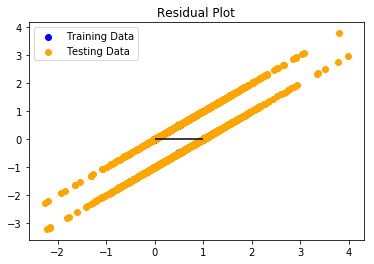

In [16]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [17]:
X_train.columns

Index(['Budget', 'Popularity', 'Metascore', 'actor_'Weird Al' Yankovic',
       'actor_50 Cent', 'actor_AJ Michalka', 'actor_ASAP Rocky',
       'actor_Aaliyah', 'actor_Aamir Khan', 'actor_Aaran Thomas',
       ...
       'genre_History', 'genre_Horror', 'genre_Music', 'genre_Musical',
       'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi', 'genre_Short',
       'genre_Thriller', 'genre_Western'],
      dtype='object', length=11511)

In [18]:
X_test.columns

Index(['Budget', 'Popularity', 'Metascore', 'actor_'Weird Al' Yankovic',
       'actor_50 Cent', 'actor_AJ Michalka', 'actor_ASAP Rocky',
       'actor_Aaliyah', 'actor_Aamir Khan', 'actor_Aaran Thomas',
       ...
       'genre_History', 'genre_Horror', 'genre_Music', 'genre_Musical',
       'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi', 'genre_Short',
       'genre_Thriller', 'genre_Western'],
      dtype='object', length=11511)

In [19]:
# Prepare Data
# We need to prepare our test and training data. Usually, implementing this takes a lot of time, but for this simple example we will just remove features that would be too complicated to preprocess.

# This function will be called later to prepare our input data
def prepare_data(df):
    # a.) Use the `id` feature as the index column of the data frame
    new_genre = df["Genre"].str.split(",", n = 17, expand = True)
    new_genre = new_genre[[0]]
    new_actor = df["Actors"].str.split(",", n = 17, expand = True)
    new_actor = new_actor[[0]]
    new_director = df["Director"].str.split(",", n = 17, expand = True)
    new_director = new_director[[0]]
    new_country = df["Country"].str.split(",", n = 17, expand = True)
    new_country = new_country[[0]]
    new_language = df["Language"].str.split(",", n = 17, expand = True)
    new_language = new_language[[0]]    
    new_production = df["Production"].str.split(",", n = 17, expand = True)
    new_production = new_production[[0]] 
    new_writer = df["Writer"].str.split(",", n = 17, expand = True)
    new_writer = new_writer[0].str.split("(", n = 17, expand = True)
    new_writer = new_writer[[0]]
    new_runtime = df["Runtime"].str.split(" ", n = 17, expand = True)
    new_runtime = new_runtime[[0]] 
    
    # making seperate last name column from new data frame 
    df["genre"]= new_genre
    df["actor"]= new_actor
    df["director"]= new_director
    df["language"]= new_language
    df["production"]= new_production
    df["writer"]= new_writer
    df['runtime']= new_runtime
    df['country']= new_country

  
    # Dropping old Name columns 
    df.dropna(inplace = True) 


    # b.) Only use easy to process features
    #  Warning: huge information loss here, you should propably include more features in your production code.
    X = df[['Budget', 'actor' ,'director', 'language', 'production', 'writer', 'runtime', 'country', 'Rated', 'Popularity', 'Metascore', 'genre']]
    y = df[['profitable']]

    print(X.shape, y.shape)
    
    # d.) The `runtime` feature is not filled in 2 of the rows. We replace those empty cells / NaN values with a 0.
    #  Warning: in production code, please use a better method to deal with missing cells like interpolation or additional `is_missing` feature columns.
    return (X, y)

In [20]:
X, y = prepare_data(moviesdf)

(5034, 12) (5034, 1)


In [21]:
X.head(100)

,Budget,actor,director,language,production,writer,runtime,country,Rated,Popularity,Metascore,genre
0,237000000.0,Sam Worthington,James Cameron,English,20th Century Fox,James Cameron,162,UK,PG-13,26.695,83.0,Action
1,300000000.0,Johnny Depp,Gore Verbinski,English,Buena Vista,Ted Elliott,169,USA,PG-13,25.567,50.0,Action
3,250000000.0,Christian Bale,Christopher Nolan,English,Warner Bros. Pictures,Jonathan Nolan,164,UK,PG-13,32.240,78.0,Action
5,258000000.0,Tobey Maguire,Sam Raimi,English,Sony Pictures,Sam Raimi,139,USA,PG-13,25.244,59.0,Action
7,250000000.0,Robert Downey Jr.,Joss Whedon,English,Walt Disney Pictures,Joss Whedon,141,USA,PG-13,59.525,66.0,Action
8,250000000.0,Daniel Radcliffe,David Yates,English,Warner Bros. Pictures,Steve Kloves,153,UK,PG,29.168,78.0,Adventure
9,250000000.0,Ben Affleck,Zack Snyder,English,Warner Bros. Pictures,Chris Terrio,151,USA,PG-13,34.015,44.0,Action
10,209000000.0,Brandon Routh,Bryan Singer,English,Warner Bros. Pictures,Michael Dougherty,154,USA,PG-13,12.649,72.0,Action
12,225000000.0,Johnny Depp,Gore Verbinski,English,Buena Vista,Ted Elliott,151,USA,PG-13,31.485,53.0,Action
14,225000000.0,Henry Cavill,Zack Snyder,English,Warner Bros. Pictures,David S. Goyer,143,USA,PG-13,27.138,55.0,Action


In [22]:
X['Rated'].value_counts()

R            2359
PG-13        1564
PG            721
Not Rated     168
G             141
Unrated        27
NOT RATED      20
NC-17          10
GP              5
Approved        5
UNRATED         4
Passed          4
TV-MA           2
TV-Y7           1
X               1
TV-PG           1
M               1
Name: Rated, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

Using TensorFlow backend.


In [24]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()

actorlabel = label_encoder.fit(X["actor"])
X_train["actor"] = actorlabel.transform(X_train["actor"])
X_test["actor"] = actorlabel.transform(X_test["actor"])

directorlabel = label_encoder.fit(X["director"])
X_train["director"] = directorlabel.transform(X_train["director"])
X_test["director"] = directorlabel.transform(X_test["director"])

languagelabel = label_encoder.fit(X["language"])
X_train["language"] = languagelabel.transform(X_train["language"])
X_test["language"] = languagelabel.transform(X_test["language"])

productionlabel = label_encoder.fit(X["production"])
X_train["production"] = productionlabel.transform(X_train["production"])
X_test["production"] = productionlabel.transform(X_test["production"])

writerlabel = label_encoder.fit(X["writer"])
X_train["writer"] = writerlabel.transform(X_train["writer"])
X_test["writer"] = writerlabel.transform(X_test["writer"])

countrylabel = label_encoder.fit(X["country"])
X_train["country"] = countrylabel.transform(X_train["country"])
X_test["country"] = countrylabel.transform(X_test["country"])

ratinglabel = label_encoder.fit(X["Rated"])
X_train["Rated"] = ratinglabel.transform(X_train["Rated"])
X_test["Rated"] = ratinglabel.transform(X_test["Rated"])

genrelabel = label_encoder.fit(X["genre"])
X_train["genre"] = genrelabel.transform(X_train["genre"])
X_test["genre"] = genrelabel.transform(X_test["genre"])

c:\users\verde\appdata\local\continuum\anaconda3\envs\ut-keras\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\verde\appdata\local\continuum\anaconda3\envs\ut-keras\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\verde\appdata\local\continuum\anaconda3\envs\ut-keras\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [25]:
X_train.head()

,Budget,actor,director,language,production,writer,runtime,country,Rated,Popularity,Metascore,genre
6010,400000.0,934,1274,12,462,1872,97,50,10,0.218588,49.0,7
1600,27000000.0,1362,589,12,377,1217,115,50,10,12.666000,46.0,5
2562,12000000.0,1297,204,12,575,405,85,50,1,26.587000,64.0,4
5316,0.0,316,535,12,309,1927,99,49,10,5.093586,44.0,0
3517,3000000.0,575,1661,12,271,2558,110,50,10,10.662000,53.0,11


In [26]:
from sklearn import tree

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6679904686258936

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=215)
rf = rf.fit(X_train, y_train.values.ravel())
rf.score(X_test, y_test)

0.7529785544082606

In [30]:
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.1809913555969544, 'Popularity'),
 (0.1557485634353846, 'Budget'),
 (0.10177231127950784, 'Metascore'),
 (0.09392351354304641, 'writer'),
 (0.09213716793287949, 'director'),
 (0.0907248605832402, 'actor'),
 (0.0828363853762549, 'production'),
 (0.08210497400537232, 'runtime'),
 (0.043515894411741855, 'genre'),
 (0.036529731466326446, 'country'),
 (0.03156073167343691, 'Rated'),
 (0.008154510695854537, 'language')]